### Решение задачи кредитного скоринга (оценка надёжности клиента). Exploratory Data Analysis (EDA).

Имеются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого.

Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

In [3]:
import pandas as pd

Чтение файла с данными

In [4]:
data = pd.read_csv('/german_credit.csv')

In [5]:
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [6]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [7]:
data.shape

(1000, 21)

Определим, есть ли пропуски в данных. Разделим признаки на количественные, бинарные, порядковые и категориальные.

In [9]:
data.isna().values.any().sum() 
# 0 - значит явных пропущенных значений нет. Однако могут быть неявные пропущенные значения.
# их нужно находить и обрабатывать отдельно для каждого признака

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

In [12]:
data.columns

Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker', 'credit_risk'],
      dtype='object')

In [13]:
for col in data:
    print(f"{col}: {data[col].unique()}")

status: ['no checking account' '... < 0 DM'
 '... >= 200 DM / salary for at least 1 year' '0<= ... < 200 DM']
duration: [18  9 12 10  8  6 24 11 30 48 36 15 42 21 27 33 28  4 47 14 39 60  5 22
 54 13 16  7 20 26 45 72 40]
credit_history: ['all credits at this bank paid back duly'
 'no credits taken/all credits paid back duly'
 'existing credits paid back duly till now'
 'delay in paying off in the past'
 'critical account/other credits elsewhere']
purpose: ['car (used)' 'others' 'retraining' 'furniture/equipment' 'car (new)'
 'business' 'domestic appliances' 'radio/television' 'repairs' 'vacation']
amount: [ 1049  2799   841  2122  2171  2241  3398  1361  1098  3758  3905  6187
  1957  7582  1936  2647  3939  3213  2337  7228  3676  3124  2384  1424
  4716  4771   652  1154  3556  4796  3017  3535  6614  1376  1721   860
  1495  1934  3378  3868   996  1755  1028  2825  1239  1216  1258  1864
  1474  1382   640  3919  1224  2331  6313   385  1655  1053  3160  3079
  1163  2679  3578 10

'status' - категориальный (порядковый в терминах нашей задачи, при перекодировке можно будет установить порядок объектов)

'duration' - количественный


'credit_history' - категориальный (порядковый)


'purpose' - категориальный


'amount' - количественный


'savings' - количественный (порядковый)


'employment_duration' - количественный


'installment_rate'- количественный


'personal_status_sex' - категориальный


'other_debtors'- категориальный


'present_residence' - порядковый


'property'- категориальный


'age' - количественный


'other_installment_plans' - категориальный


'housing'- категориальный


'number_credits'- порядковый


'job' - категориальный (порядковый)


'people_liable' - порядковый


'telephone' - бинарный


'foreign_worker' - бинарный


'credit_risk' - бинарный

Выведем среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [16]:
data.groupby('purpose')['amount'].mean()

purpose
business               8209.333333
car (new)              5370.223301
car (used)             3066.983425
domestic appliances    2728.090909
furniture/equipment    2487.685714
others                 3062.948718
radio/television       1498.000000
repairs                3180.400000
retraining             4158.041237
vacation               1205.888889
Name: amount, dtype: float64

Определим процент клиентов моложе 30 лет (колонка age), снимающих жилье (колонка housing). А также процент клиентов старше 40 лет, снимающих жилье.

In [31]:
print(int(((data['age'] < 30) & (data['housing'] == 'rent')).sum() / (data['age'] < 30).sum() * 100),
      int(((data['age'] > 40) & (data['housing'] == 'rent')).sum() / (data['age'] > 40).sum() * 100))

66 68


Определим у скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3.

In [8]:
((data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5')|(data['number_credits'] == '>=6'))).sum()

1

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Построим зеркальные горизонтальные гистограммы.

In [19]:
df = data.groupby(["status", "credit_risk"])['job'].count().unstack()
df.index

Index(['... < 0 DM', '... >= 200 DM / salary for at least 1 year',
       '0<= ... < 200 DM', 'no checking account'],
      dtype='object', name='status')

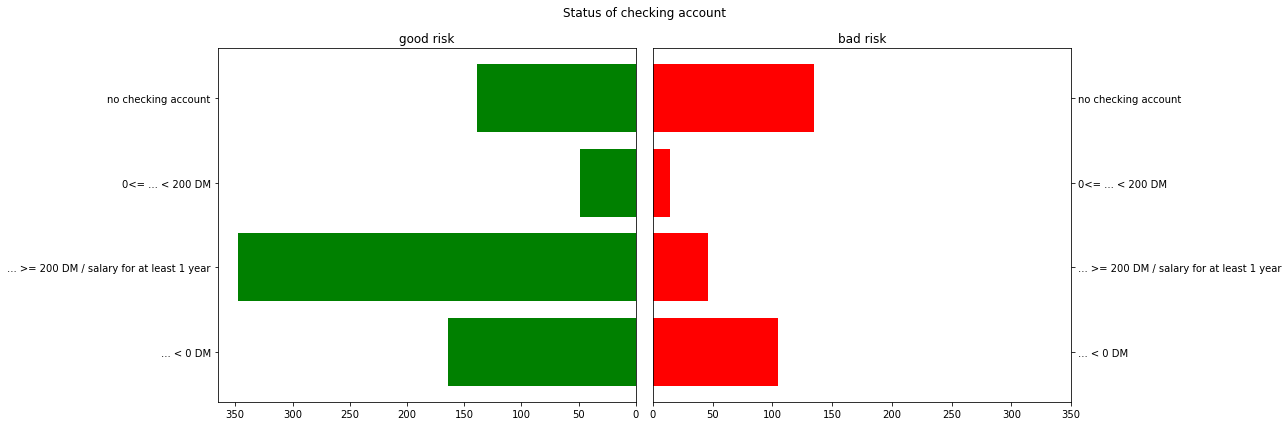

In [26]:
# pd.unstack() - преобразовывает результат groupby() в таблицу
df = data.groupby(["status", "credit_risk"])['job'].count().unstack()
fig, axes = plt.subplots(ncols=2, figsize=(18, 6))
# barh - horisontal bar plot
# горизонтальная стлобцовая диаграмма
axes[0].barh(df.index, df.good, color='g')
# инвертировать направление оси Ох
axes[0].invert_xaxis()
axes[1].barh(df.index, df.bad, color='r')
# yaxis.tick_right() - переносит подписи на оси у влево
axes[1].yaxis.tick_right()
axes[0].set_title("good risk")
axes[1].set_title("bad risk")
fig.suptitle("Status of checking account")
# xlim() - предельный диапазон по оси Ох
plt.xlim([0, 350])
# tight_layout - располагает две части графика ближе друг к другу
fig.tight_layout()

In [28]:
import seaborn as sns

Теперь построим гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn.

<AxesSubplot:xlabel='savings', ylabel='count'>

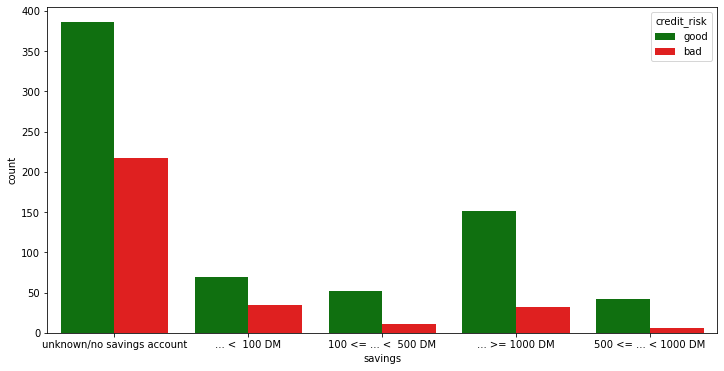

In [33]:
plt.figure(figsize=(12,6))
sns.countplot(x="savings", data=data, hue="credit_risk", palette=['g', 'r'])

Для каждого размера сберегательного счёта оценим не только количество положительных и отрицательных кейсов, но и их распределение по возрасту.

<AxesSubplot:xlabel='savings', ylabel='age'>

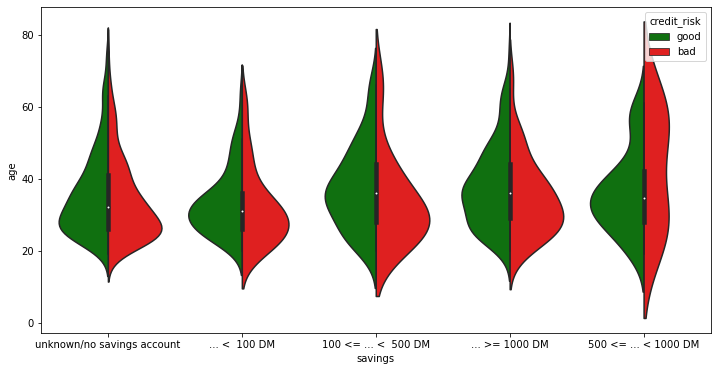

In [35]:
plt.figure(figsize=(12, 6))
sns.violinplot(data=data, x="savings", y="age", hue="credit_risk", split=True, palette={"good": "g", "bad": "r"})

Посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

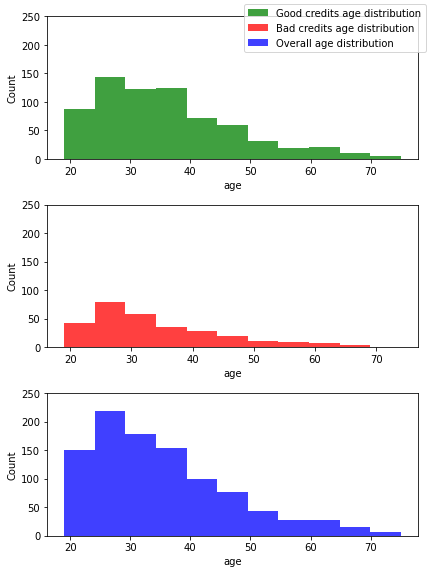

In [43]:
fig, axes = plt.subplots(nrows=3, figsize=(6, 8))
sns.histplot(x="age", data=data, ax=axes[2], color="b", bins=11).set(ylim=(0,250))
sns.histplot(x="age", data=data[data["credit_risk"] == "good"], color="g", ax=axes[0], bins=11).set(ylim=(0,250))
sns.histplot(x="age", data=data[data["credit_risk"] == "bad"], color="r", ax=axes[1], bins=11).set(ylim=(0,250))
fig.tight_layout()
fig.legend(["Good credits age distribution", "Bad credits age distribution", "Overall age distribution"])

Построим диаграмму рассеяния с продолжительностью и размерами кредитов в качестве осей. Обозначим положительные и отрицательные кейсы разными цветами.

<AxesSubplot:xlabel='amount', ylabel='duration'>

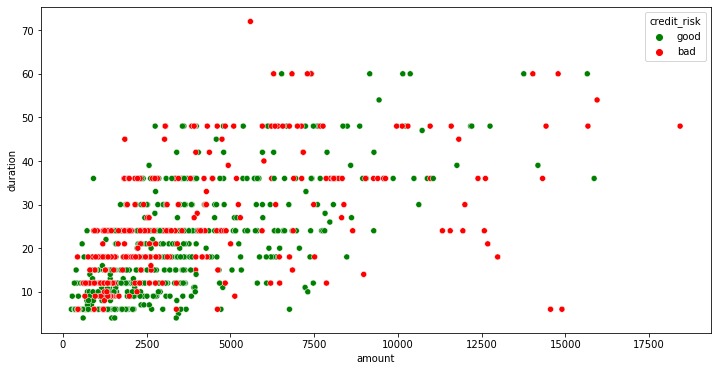

In [44]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x="amount", y="duration", hue="credit_risk", palette={"good": "g", "bad": "r"})

Построим 3D версию диаграммы рассеяния, добавив ось с возрастом.

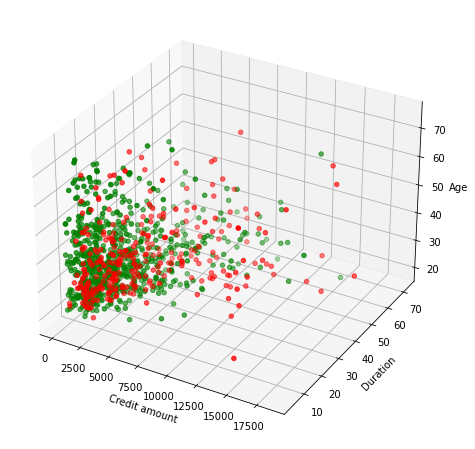

In [45]:
plt.figure(figsize=(8, 8))
graph = plt.axes(projection="3d")
graph.scatter(data[(data["credit_risk"]=="good")]["amount"], data[(data["credit_risk"]=="good")]["duration"], data[(data["credit_risk"]=="good")]["age"], color="green")
graph.scatter(data[(data["credit_risk"]=="bad")]["amount"], data[(data["credit_risk"]=="bad")]["duration"], data[(data["credit_risk"]=="bad")]["age"], color="red")
graph.set_xlabel("Credit amount")
graph.set_ylabel("Duration")
graph.set_zlabel("Age")
plt.show()

Представим все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавимся от категориальных признаков.

In [46]:
#One-hot encoder для категориальных
data = pd.get_dummies(data=data, columns=["status", "purpose", "personal_status_sex", "property", "other_installment_plans"])
#Для порядковых порядок задаю вручную, потому что sort сделает по длине строки.
universal_mapper = {
    "employment_duration": {"1 <= ... < 4 yrs": 2, "4 <= ... < 7 yrs": 3, "< 1 yr": 1, ">= 7 yrs": 4, "unemployed": 0},
    "credit_history": {"all credits at this bank paid back duly": 3, "critical account/other credits elsewhere": 0, "delay in paying off in the past": 1, "existing credits paid back duly till now": 2, "no credits taken/all credits paid back duly": 4},
    "savings": {"... <  100 DM": 1, "... >= 1000 DM": 2,"100 <= ... <  500 DM": 3,"500 <= ... < 1000 DM": 4,"unknown/no savings account": 0},
    "installment_rate": {"20 <= ... < 25": 1, "25 <= ... < 35": 2, "< 20": 0, ">= 35": 3},
    "other_debtors":{"co-applicant":1, "guarantor":2, "none":0},
    "present_residence":{"1 <= ... < 4 yrs":1, "4 <= ... < 7 yrs":2, "< 1 yr":0, ">= 7 yrs":3},
    "housing": {"for free":0, "own":1, "rent":2},
    "number_credits": {"1":0, "2-3":1, "4-5":2, ">= 6":3},
    "job":{"manager/self-empl./highly qualif. employee":3,"skilled employee/official":2,"unemployed/unskilled - non-resident":0,"unskilled - resident":1},
    "people_liable": {"0 to 2":0, "3 or more":1},
    "telephone":{"no":0, "yes (under customer name)":1},
    "foreign_worker":{"no":0, "yes":1},
    "credit_risk":{"bad":0,"good":1}
}
data = data.replace(universal_mapper)